## Federal interest rate hikes, regional banks, and the growing risk to investors.
### By, Montel Hardy

## Introduction

### The Federal Open Market Committee is the policy making body for the Federal Reserve bank, the "discount  rate" or decreasing the interest rate charged to commercial banks and other depository institutions on loans they receive from their regional Federal Reserve Bank's lending facility (federalreserve.gov). 

### After using the discount rate to stimulate the economy when job losses began mounting after the COVID-19 pandemic began, inflation rose to nearly four times the normal levelin the following two years. So much so, that over the last year, the FOMC has to reverse course and raise rates steadily on nine different occasions. While inflation has lowered significantly, higher borrowing rates have created a tough environment for regional banks. They make less money from small business loans, mortgages, and other fixed income assets (rocketmortgage.com). As a result, regional bank stocks have been down this year and a few regional banks have failed (Silicon Valley Bank, Signature Bank, and First Republic Bank). 

### Below, I accomplish the below items: 

*  To analyze five years of price action on popular regional bank ETF to highlight how this economic environment has afffected investor sentiment.

* To analyze Zion's Bank stock's performance since the Federal funds rate started increasing in March 2022.

* To perform linear regression on Zion's Bank's potential stock returns over time using average closing price per month. 


## Setup

#### First I import all the necessary Libraries and then print a message to confirm each line of code has been executed fully. 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


print ('Lets get started!')

Lets get started!


## Analysis - KRE

#### To begin my analysis, I imported about four years of historcal stock data for an S&P Regional Banking ETF called 'KRE'. This ETF holds many the top US regional banks as well as some smaller banks in it's holdings and saw a return of 40% in 2021 while inflation was running high. Since then, this ETF has has been on the downswing. 

#### Below I read the historical data into the dataframe, observe the data types, and look exclusively at the top five rows. 

In [100]:
kre_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1009 non-null   int64  
 1   Date       1009 non-null   object 
 2   Open       1009 non-null   float64
 3   High       1009 non-null   float64
 4   Low        1009 non-null   float64
 5   Close      1009 non-null   float64
 6   Adj_Close  1009 non-null   float64
 7   Volume     1009 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 63.2+ KB


In [101]:
kre_1.head()

,Year,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019,5/10/2019,54.709999,55.209999,54.070000,55.090000,49.375965,6873900
1,2019,5/13/2019,54.000000,54.279999,52.619999,52.840000,47.359341,10748200
2,2019,5/14/2019,53.020000,54.020000,52.770000,53.599998,48.040501,6799800
3,2019,5/15/2019,52.980000,53.090000,52.200001,52.930000,47.440006,9134600
4,2019,5/16/2019,53.279999,53.849998,53.220001,53.500000,47.950882,6662700


#### Next, I use analyze the Groupby function to analyze the the change in volume as well as adjusted close over time. I chose Adjusted Close over Close, because adjusted closing price accounts for anything that might affect the price after close (dividends, stock splits) which makes it the better benchmark for historical closing price data.

In [104]:
year_vol = kre_1.groupby(['Year'])['Volume'].aggregate('mean')
year_vol.astype(str)


Year
2019     6051198.773006135
2020      9575073.51778656
2021     8912577.777777778
2022     9218132.270916335
2023    22853896.666666668
Name: Volume, dtype: object

In [136]:
year_adjclose = kre_1.groupby(['Year'])['Adj_Close'].aggregate('mean')
print(year_adjclose)




Year
2019    48.381986
2020    39.166030
2021    63.767281
2022    63.292454
2023    51.589684
Name: Adj_Close, dtype: float64


#### After some analysis, I noticed a couple things about KRE and how this security has performed after the pandemic rate cut. 

#### While KRE saw huge returns in 2021, volume (count of buys or sells of this security in the market) didn't change very much until 2022. While this ETF had clumbed to very high closing prices prior to in rate hikes by the FED, One could surmise that the rise in interest rates triggered a large spike in volume as investors began to sell this security in anticipation of a tough path ahead for regional banks. As you can see in the line graph below, volume nearly doubles going from 2022 going in to 2023. 

#### My observations are confirmed as we saw higher closing prices in 2022, but also a downtrend on closing prices that continue into 2023. 

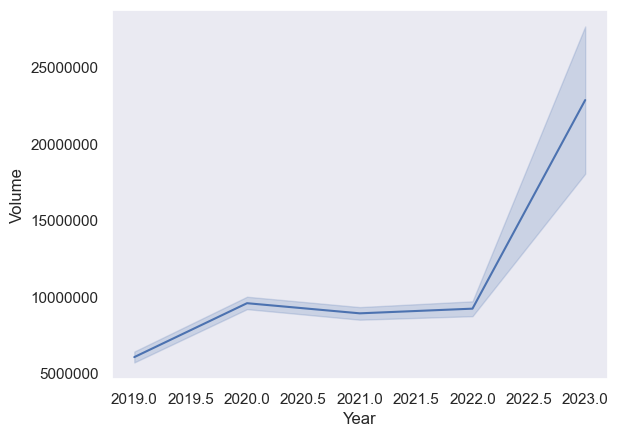

In [141]:
sns.lineplot(x = "Year", y = "Volume", data=kre_1)
sns.set(style='dark',)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### ETF PERFORMANCE OVER TIME, MENTION DOWNTREND.

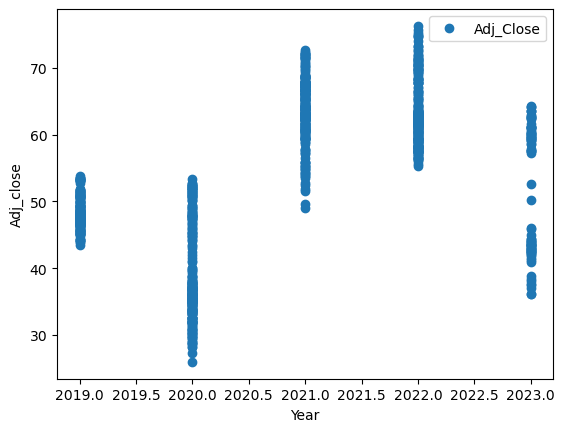

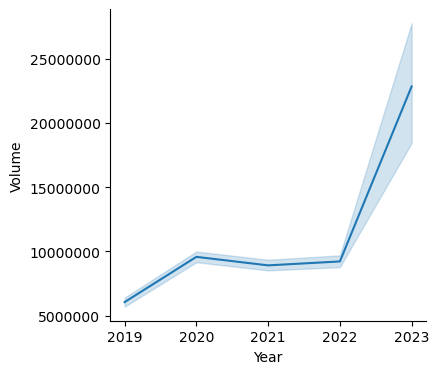

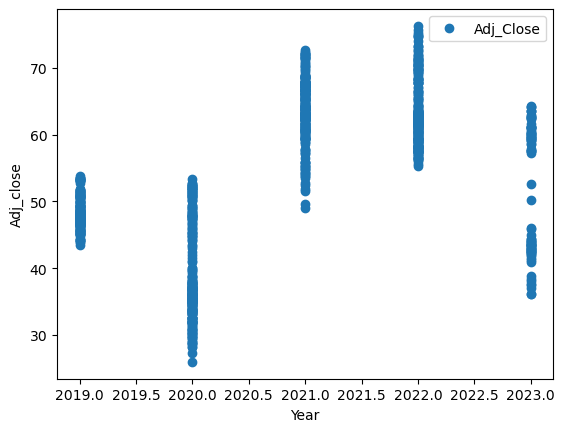

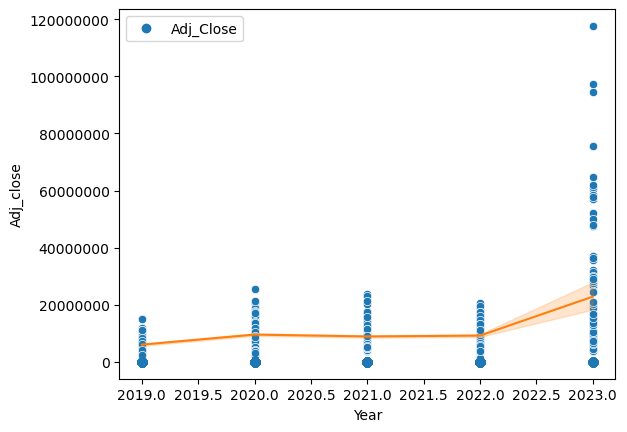

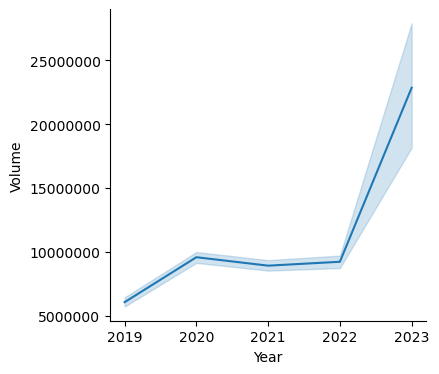

In [126]:
sns.relplot(x= "Year", y= "Volume", height=4, kind="line", data=kre_2)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


#### Below, I explote other benchmarks in the dataset to confirm the trend that we see above. Typically, when stocks are in an updtrend, investors would see higher average highs and higher average lows over time. However, from its peak in 2021 we see lower highs and lower lows which confirms a significant downtrend for this ETF over the last two years. 

In [139]:
year_highs = kre_1.groupby(['Year'])['High'].aggregate('mean')
year_highs

Year
2019    53.960184
2020    42.929288
2021    67.448294
2022    65.561673
2023    52.692778
Name: High, dtype: float64

In [140]:
year_lows = kre_1.groupby(['Year'])['Low'].aggregate('mean')
year_lows

Year
2019    53.080061
2020    41.509486
2021    65.920238
2022    64.055060
2023    51.180222
Name: Low, dtype: float64

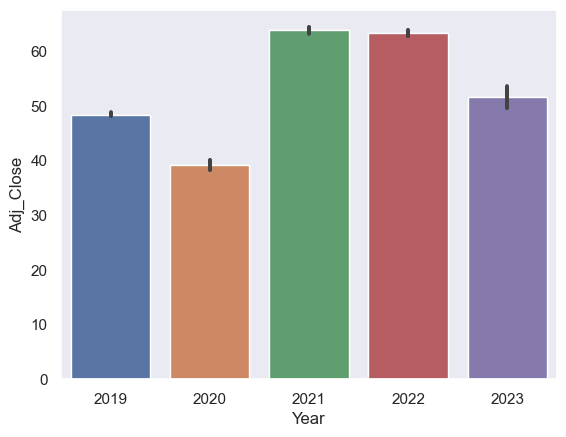

In [138]:
sns.barplot(x = 'Year', y = 'Adj_Close', data = kre_1)
plt.show()

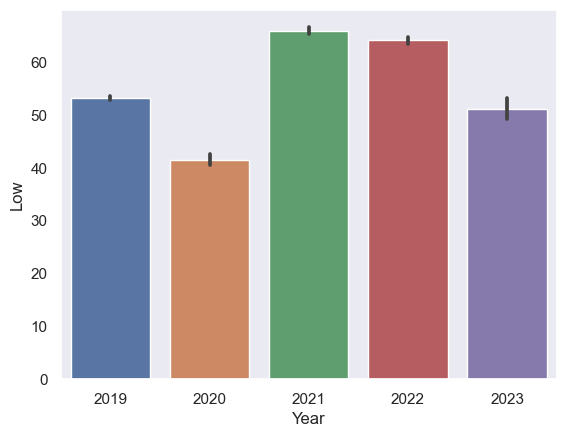

In [144]:
sns.barplot(x = 'Year', y = 'Low', data = kre_1)
plt.show()

#### Now that we've explored the effect of the rate hikes on regional banks through our analysis of KRE. I'd like to drill down a bit further and more analysis on a regional bank stock. For the purposes of this study, I've chosen Zions Bancorporation (Ticker:ZION). I analyzed data from April 2022 to present, this gives me a clear sample for linear regression based on the price action after the rate hikes which I will perform at the end of this presentation.

## Analysis - ZION

#### ZION is in KRE's top 10 holdings, and they've seen their liquidity and stock price suffer due to fiscal tightening as well as consumer reaction from the collapse of three regional banks earlier this year (SVB, Signature Bank, First Republic) which is important to this project but I also chose ZION for a few other reasons. Please consider the following facts from their most recent quarterly report: 

* Zions bank currently holds 37.6 billion dollars in uninsured deposits, this accounts for 45 percent of their total deposits.
* Zions bank saw a 2.45 billion dollar decrease in deposits as of March 31, 2023.
* Zions' unrealized losses on available-for-sale investment securities was 667 million as of March 31, 2023. This number improved from 1.063 billion noted in December of 2022 (fintel.io).

#### After reading the csv into a pandas dataframe and inspecting the data like usual, I use the groupby function to compare different columns and then visualize the relationships between benchmarks that I found interesting.

In [145]:
zions = pd.read_csv(r"C:\Users\Montel\Downloads\Zions_sheet.csv")
zions

,Year,Date,Open,High,Low,Close,Adj_Close,Volume
0,2022,4/1/2022,66.610001,67.250000,64.269997,64.300003,62.409370,2479500
1,2022,4/4/2022,64.290001,64.959999,62.770000,64.099998,62.215248,1220400
2,2022,4/5/2022,64.059998,64.930000,63.790001,64.400002,62.506428,1384200
3,2022,4/6/2022,64.010002,64.400002,63.169998,63.669998,61.797890,1568200
4,2022,4/7/2022,63.570000,63.950001,62.009998,63.180000,61.322300,1093500
...,...,...,...,...,...,...,...,...
272,2023,5/3/2023,24.330000,25.190001,22.230000,22.660000,22.660000,9993700
273,2023,5/4/2023,21.790001,22.299999,18.260000,19.930000,19.930000,25523000
274,2023,5/5/2023,23.290001,24.490000,22.209999,23.760000,23.760000,14680200
275,2023,5/8/2023,25.309999,26.459999,23.639999,24.260000,24.260000,12038700


In [146]:
zions.dropna(inplace=True)


In [148]:
zions_1 = zions.loc[:,['Date', 'Adj_Close']]
zions_1

,Date,Adj_Close
0,4/1/2022,62.409370
1,4/4/2022,62.215248
2,4/5/2022,62.506428
3,4/6/2022,61.797890
4,4/7/2022,61.322300
...,...,...
272,5/3/2023,22.660000
273,5/4/2023,19.930000
274,5/5/2023,23.760000
275,5/8/2023,24.260000


In [149]:
zions_4 = zions.loc[:,['Volume', 'Adj_Close']]
zions_4

,Volume,Adj_Close
0,2479500,62.409370
1,1220400,62.215248
2,1384200,62.506428
3,1568200,61.797890
4,1093500,61.322300
...,...,...
272,9993700,22.660000
273,25523000,19.930000
274,14680200,23.760000
275,12038700,24.260000


In [152]:
zions.corr()

,Year,Open,High,Low,Close,Adj_Close,Volume
Year,1.000000,-0.648338,-0.648237,-0.647813,-0.647817,-0.631773,0.473720
Open,-0.648338,1.000000,0.995332,0.995367,0.992951,0.991784,-0.705426
High,-0.648237,0.995332,1.000000,0.991893,0.995994,0.994567,-0.671985
Low,-0.647813,0.995367,0.991893,1.000000,0.996296,0.995668,-0.739716
Close,-0.647817,0.992951,0.995994,0.996296,1.000000,0.999182,-0.707333
Adj_Close,-0.631773,0.991784,0.994567,0.995668,0.999182,1.000000,-0.713532
Volume,0.473720,-0.705426,-0.671985,-0.739716,-0.707333,-0.713532,1.000000


#### Just as we saw with ticker: KRE, it appears ZIONS' downtrend can be confirmed as well. What might be most concerning about this trend is that in early May, ZIONS broke below their pandemic low price of 24.68. 

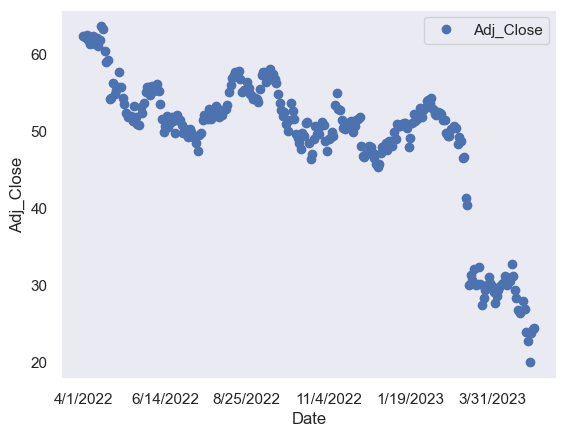

In [151]:
zions_1.plot(x='Date', y='Adj_Close', style='o')
plt.xlabel('Date')
plt.ylabel('Adj_Close')
plt.show()

#### To view this price action through the eyes of an investor, I use the resample function and aggregate date by month and find the average monthly returns for investors in ZIONS.

In [153]:
zions_1['Date'] = pd.to_datetime(zions_1['Date'])

In [154]:
zions_1.set_index('Date', inplace=True)

In [155]:
zions_2 = zions_1.resample('M').mean()

####  After calling the function and adding the new benchmark, I drop any 'NaN' values. In this instance, April wouldn't have a monthly return as it is the first month in the data I'm using. 

In [156]:

zions_2['Returns'] = np.log(zions_2['Adj_Close']) - np.log(zions_2['Adj_Close'].shift(1))
zions_2

,Adj_Close,Returns
Date,,
2022-04-30,60.310939,NaN
2022-05-31,53.539385,-0.119096
2022-06-30,52.401013,-0.021492
2022-07-31,50.612674,-0.034724
2022-08-31,55.002248,0.083172
2022-09-30,55.035180,0.000599
2022-10-31,49.907956,-0.097792
2022-11-30,50.760206,0.016932
2022-12-31,47.726944,-0.061617


In [157]:
zions_2.dropna(inplace=True)
zions_2

,Adj_Close,Returns
Date,,
2022-05-31,53.539385,-0.119096
2022-06-30,52.401013,-0.021492
2022-07-31,50.612674,-0.034724
2022-08-31,55.002248,0.083172
2022-09-30,55.035180,0.000599
2022-10-31,49.907956,-0.097792
2022-11-30,50.760206,0.016932
2022-12-31,47.726944,-0.061617
2023-01-31,50.754764,0.061509


#### After that, I visualize the data to find that returns have been minimal over the last year. The changing economic conditions has triggered a sell off and the lower the stock price fell, the more volume has been sold off.

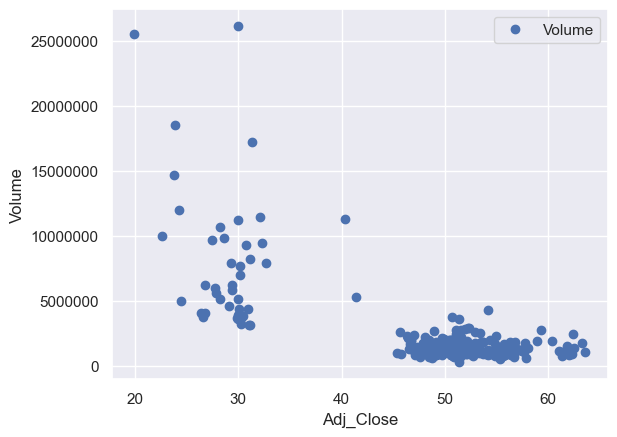

In [171]:
zions.plot(x= 'Adj_Close'  , y= 'Volume', style='o')
plt.xlabel('Adj_Close')
plt.ylabel('Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

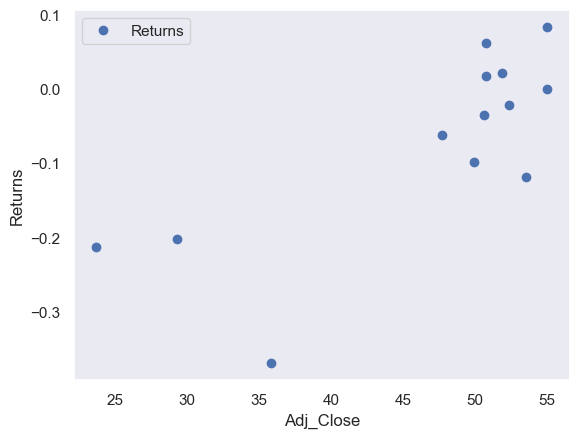

In [158]:
zions_2.plot(x= 'Adj_Close'  , y= 'Returns', style='o')
plt.xlabel('Adj_Close')
plt.ylabel('Returns')
plt.show()

## Linear Regression

#### To confirm the correlation between the 'Returns' column I created and the 'Adj Close' (Adjusted Close) column, I perform linear regression. I begin my importing statsmodels.api, assigning the proper variables to the columns, and fit the model.

#### After fitting the model, I then show it as well as various forms of the model to examine the correlation between the two variables. As you can see, there's a slight positive relationship between the two variables. 

In [159]:
import statsmodels.api as sm

In [160]:
y = zions_2[['Returns']]
x = zions_2[['Adj_Close']]

In [161]:
x = sm.add_constant(x)

In [162]:
model = sm.OLS(y, x).fit()

In [164]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Adj_Close', fig=fig)

eval_env: 1


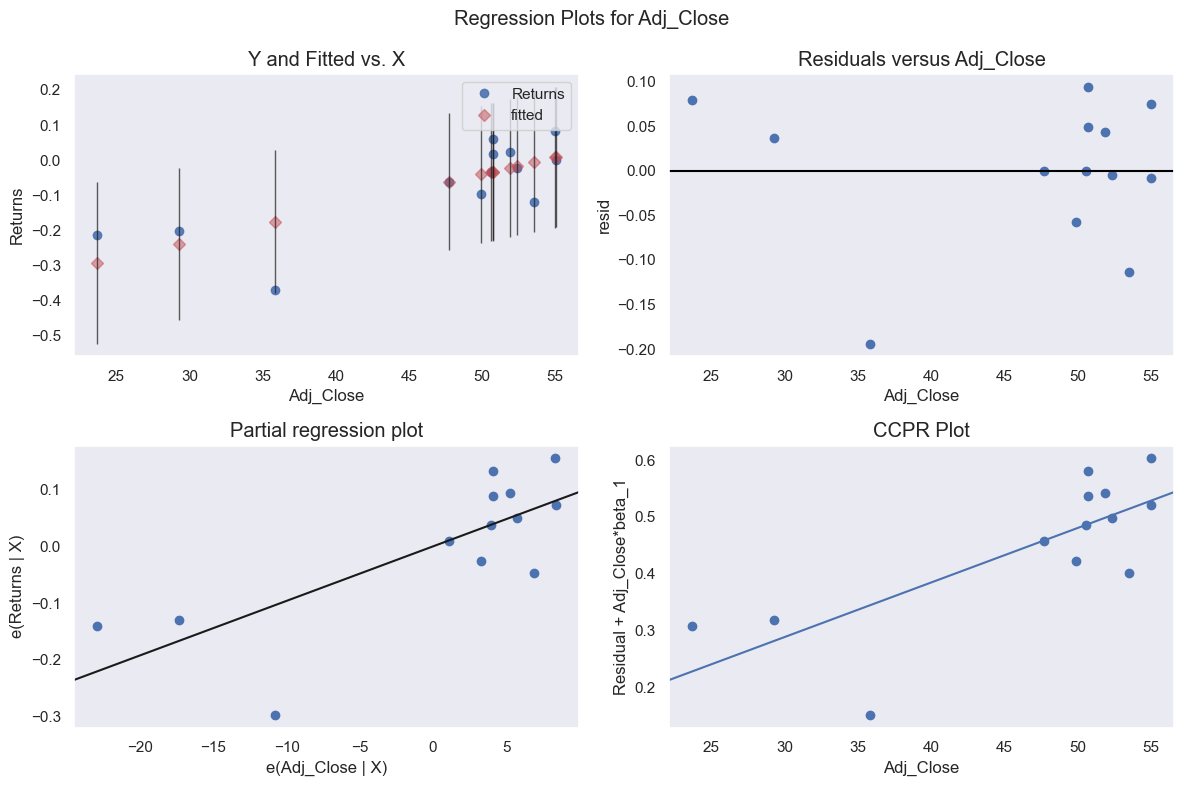

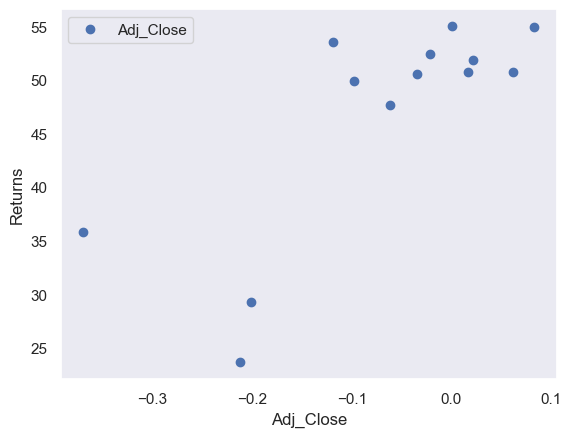

In [165]:
zions_2.plot(x='Returns', y='Adj_Close', style='o')
plt.xlabel('Adj_Close')
plt.ylabel('Returns')
plt.show()

#### To evaluate the model, I use the model.summary() function to view the results of my model. In the finance sector, a R squared score of 0.40 would signal a low correlation and a score of 0.7 would be considered ideal. The R squared score for my model is 0.59, which is near the higher end of that spectrum. 

In [163]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     15.85
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00215
Time:                        17:45:37   Log-Likelihood:                 14.616
No. Observations:                  13   AIC:                            -25.23
Df Residuals:                      11   BIC:                            -24.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5200      0.115     -4.521      0.0

C:\Users\Montel\anaconda34\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Final Remarks

#### While the Federal Reserve Monetary committee is weighing the risk of raising the risk again or potentially pausing in the month of June, it is apparent that the hikes have created a challenging fiscal environment for banks and even more so for regional banks across the country. Banks make money through investment and through lending money that consumers have deposited or invested with them. Because of three regional bank failures in the last five or so months, investors and consumers have withdrew desposits (especially uninsured deposits) and if this accelerates over time it can cause major liquidity concerns for these banks. 

####  I analyzed five years of price action on KRE to highlight how this economic environment has afffected investor sentiment. Then, I went a step further to analyze Zion's Bank stock's performance since the Federal funds rate started increasing in March 2022. From there I performed linear regression on Zion's Bank's potential stock returns over time using average closing price per month. 

#### In the case of Zions Bancorp, losing 2.45 billion dollars in liquidity from customer deposits over the last quarter is a really tough reality to endure. Higher interest rates in the second quarter, coupled with weighing the effect of the collapse of First Republic Bank (occured on May 1, 2023) could mean even less money availble for to invest and to loan to consumers. If you know anyone that may have more than the FDIC insured 250,000 dollars invested in a regional bank, now is a good time to let them know to make a withdrawal. Additionally, for any investors in an individual regional bank stocks I would be careful not to misinterpet the recent price action as a buy signal and would be sure to sell off any amount of stock that one would fear losing money on. #### 


## References

#### Curry, B. (2023, April 12). What happens when the Fed raises interest rates?. Forbes. https://www.forbes.com/advisor/investing/fed-raises-interest-rates/#:~:text=A%20higher%20fed%20funds%20rate,they%20charge%20for%20consumer%20loans. 

#### The discount window and discount rate. Federal Reserve Board - The Discount Window and Discount Rate. (2023, May 30). https://www.federalreserve.gov/monetarypolicy/discountrate.htm 

#### Kre: SPDR® S&amp;P® Regional Banking ETF. State Street Global Advisors. (n.d.). https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-regional-banking-etf-kre 

#### Nowaki, L. (n.d.). 2022 fed rate hike impact on mortgages, home buying and more. 2022 Fed Rate Hike Guide | Rocket Mortgage. https://www.rocketmortgage.com/learn/fed-rate-hike 

#### Zions bancorporation NA - 10Q - quarterly report - May 05, 2023 - fintel. Zions Bancorporation NA - 10Q - Quarterly Report - May 05, 2023. (2023, May 5). https://fintel.io/doc/sec-zions-bancorporation-national-association-ut-109380-10q-2023-may-05-19482-9641 